## This jupyter notebook will plot niches & interfaces frequencies that were discovered by NIPMAP in the myeloma dataset 

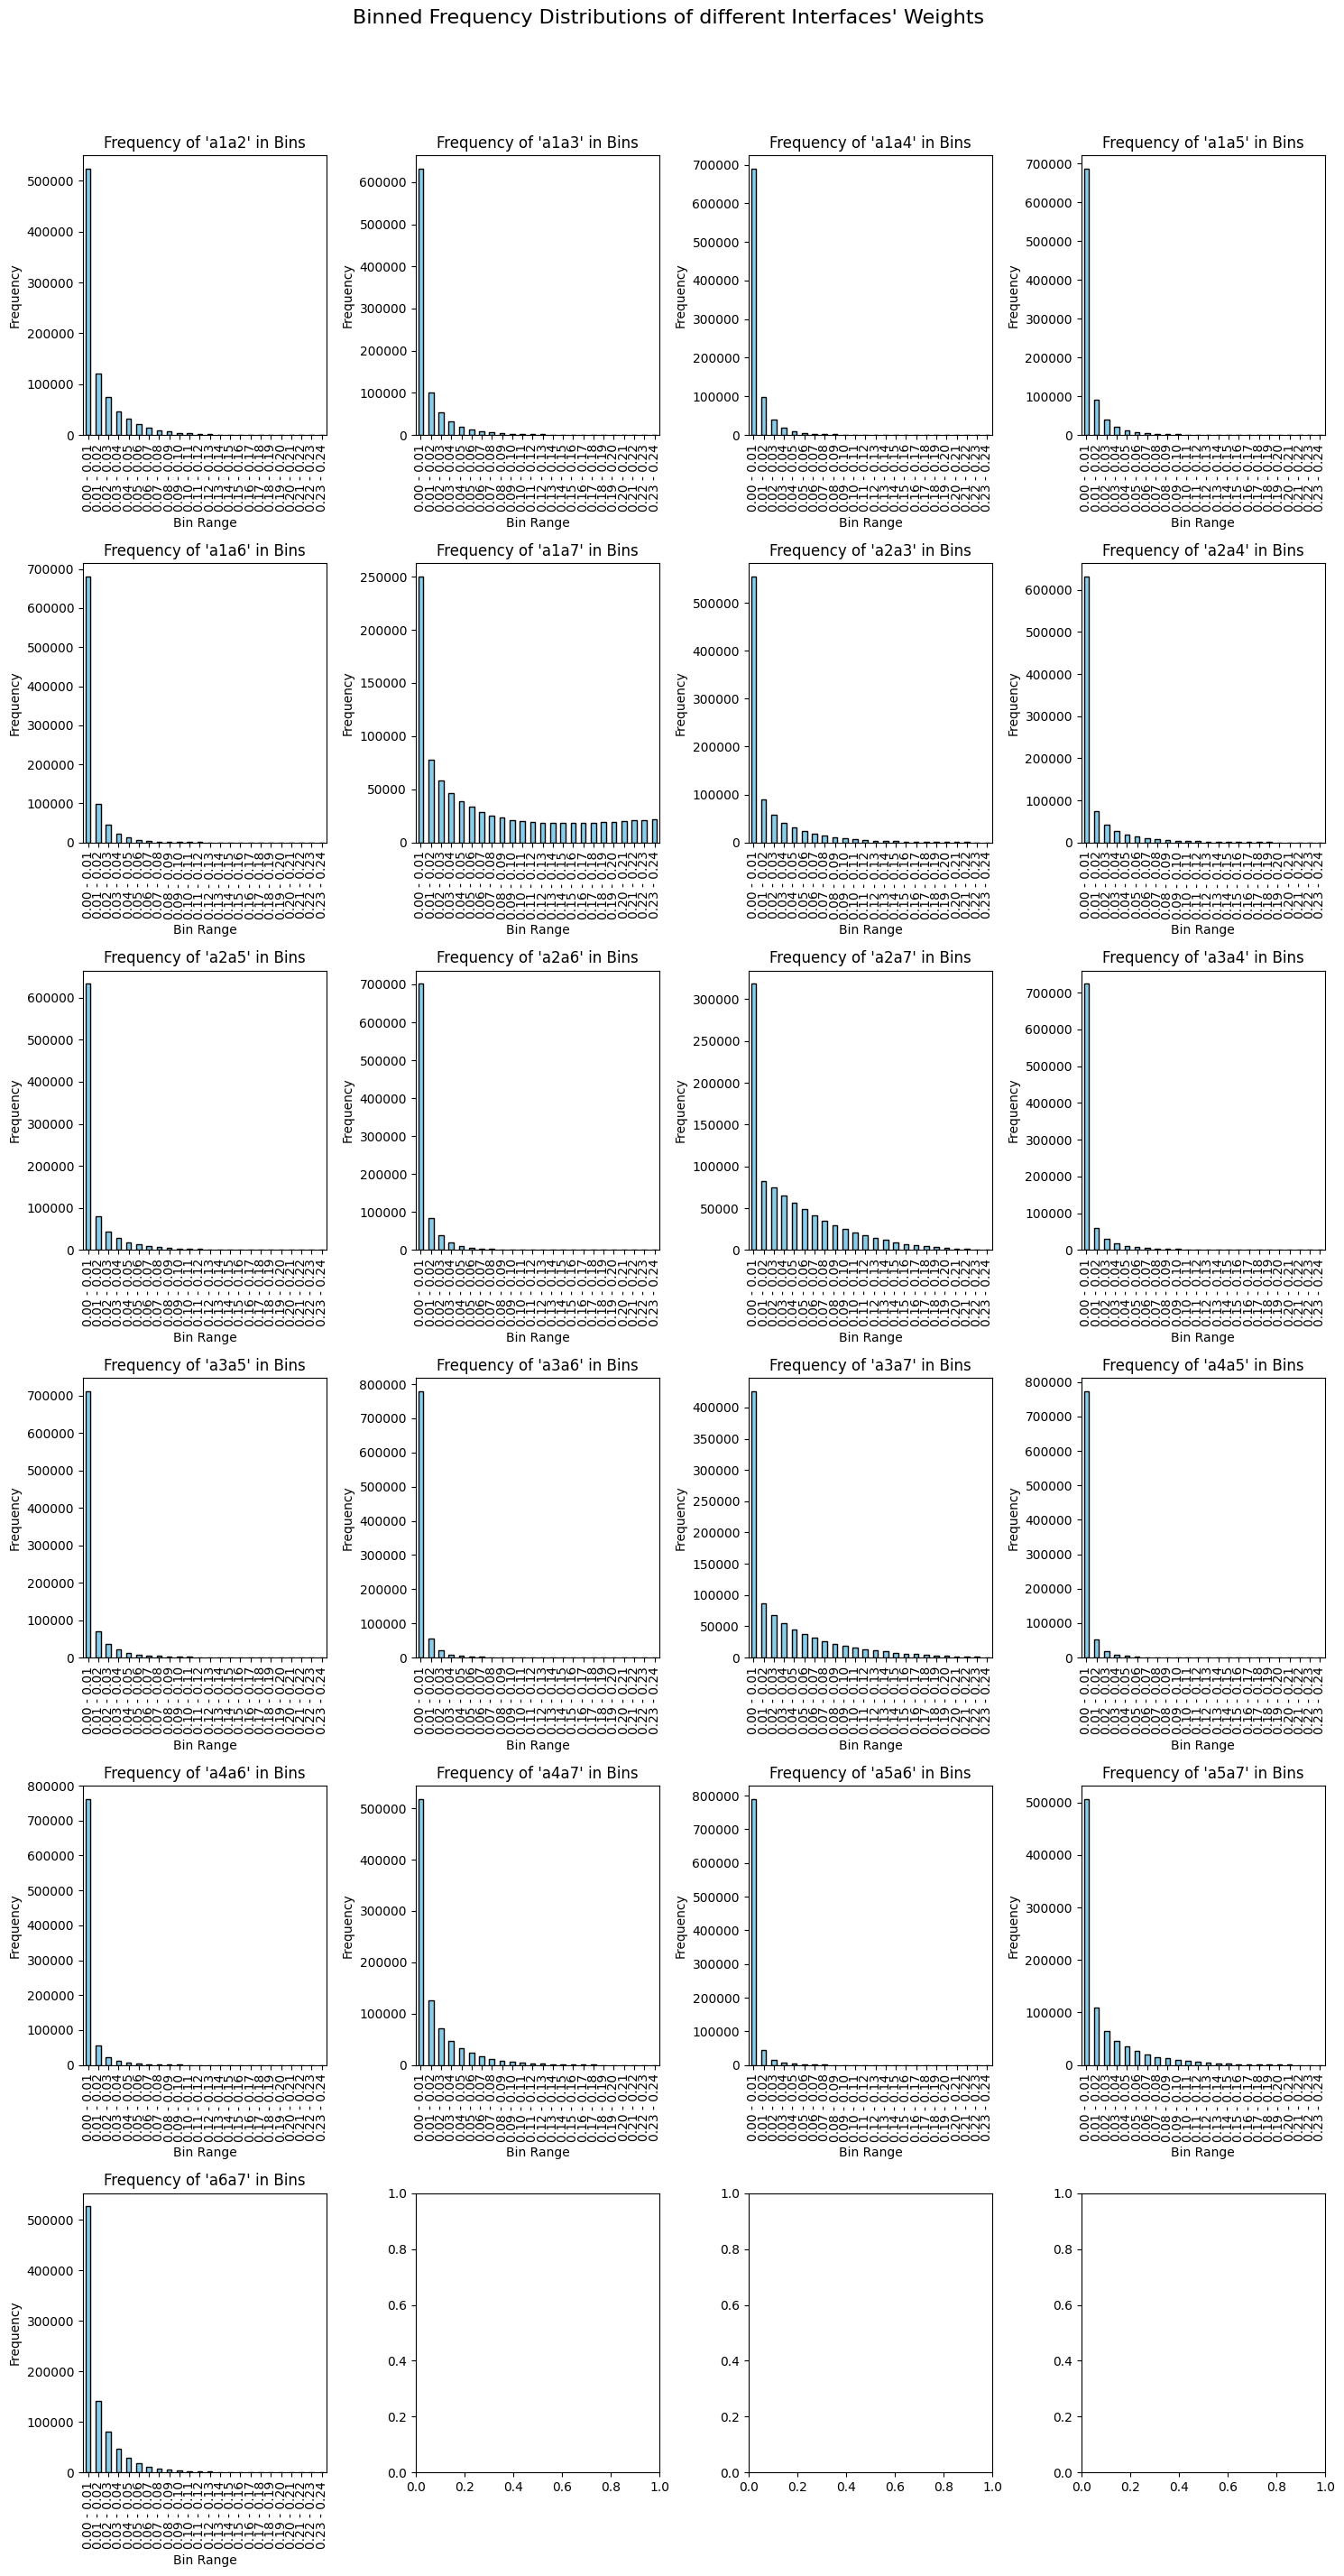

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
data = pd.read_csv('./7n_output/cells_niches_coordinates_interfaces.csv')

#specify list of columns to be plotted (interfaces in this case )
i_list = ['a1a2', 'a1a3', 'a1a4', 'a1a5', 'a1a6', 'a1a7', 'a2a3', 'a2a4', 'a2a5', 'a2a6', 'a2a7', 'a3a4', 'a3a5', 'a3a6', 'a3a7', 'a4a5', 'a4a6', 'a4a7', 'a5a6', 'a5a7', 'a6a7']

#define bins for frequencies based on interval weights for individual cell. max interval weight possible is 0.25, as intervals will only arise when a cell lays in between two niches, so roughly 50/50 weights of both niches are assigned to the cell  
bins = np.arange(0, 0.25, 0.01)  # Bins from 0.0 to 0.25 with 0.01 intervals
labels = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)]

#plot the binned frequency distribution as barplots 
fig, axs = plt.subplots(6, 4, figsize=(15, 30))  # 2 rows, 3 columns for 6 subplots
fig.suptitle("Binned Frequency Distributions of different Interfaces' Weights ", fontsize=16)

#loop over intervals in the i_list 
for i, (col, ax) in enumerate(zip(i_list, axs.flat)):
    binned_values = pd.cut(data[col], bins=bins, labels=labels, include_lowest=True)
    bin_counts = binned_values.value_counts().sort_index()
    
    #plot
    bin_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f"Frequency of '{col}' in Bins")
    ax.set_xlabel("Bin Range")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


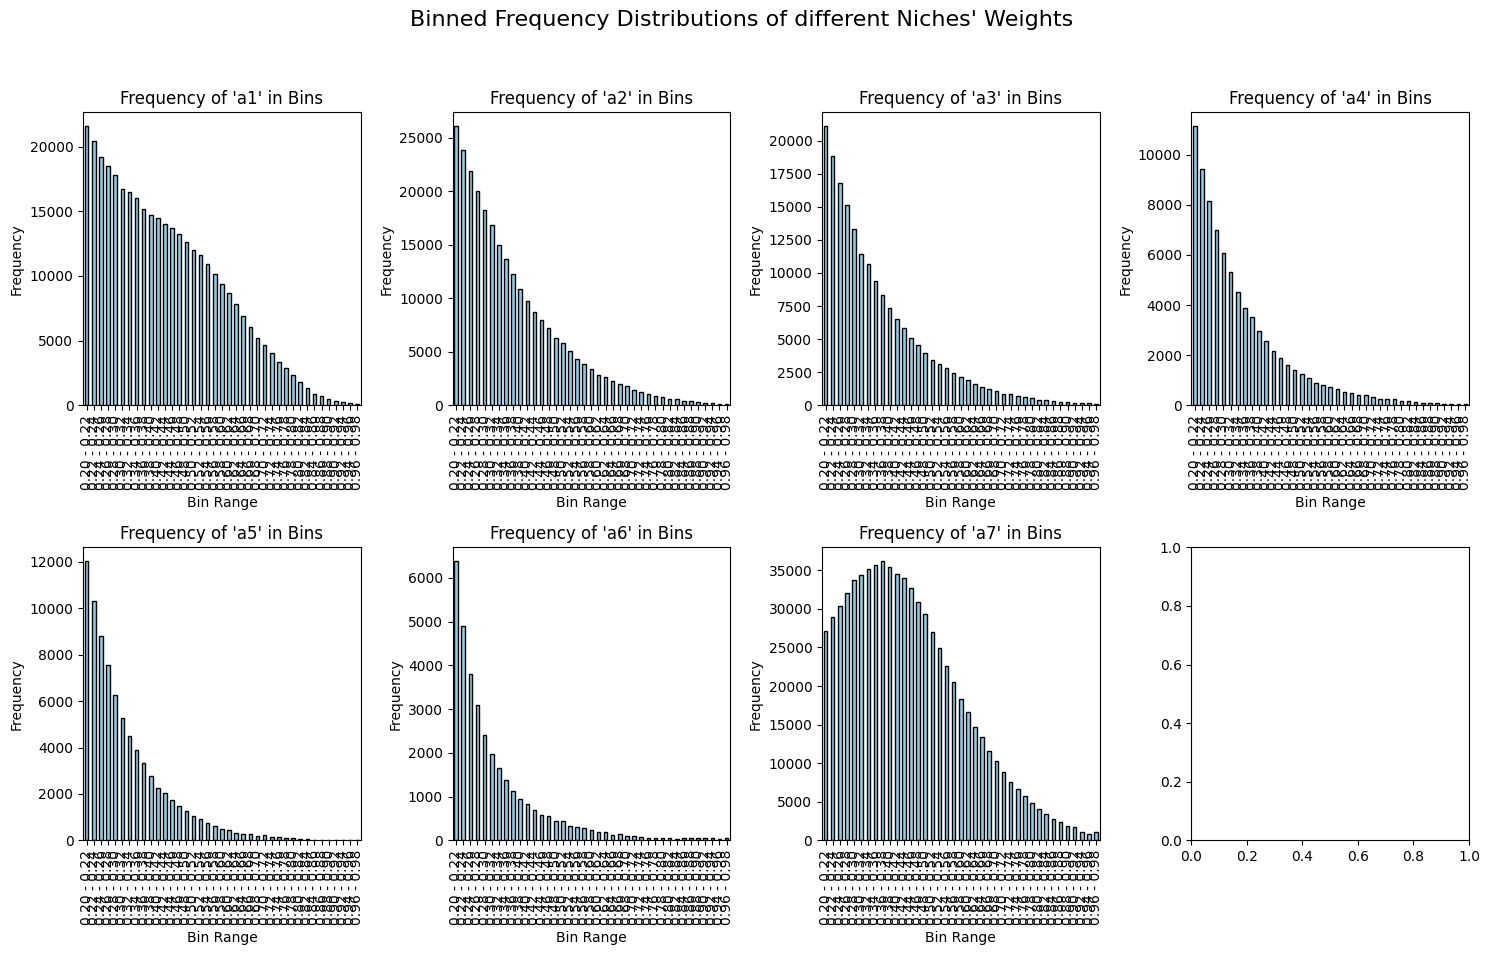

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./7n_output/cells_niches_coordinates_interfaces.csv')

#specify a list of columns used for plotting - niches 
n_list = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

#define bin sizes. max niche weight is 1.0. 
bins = np.arange(0.2, 1.0, 0.02)  
labels = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)]

fig, axs = plt.subplots(2, 4, figsize=(15, 10)) 
fig.suptitle("Binned Frequency Distributions of different Niches' Weights ", fontsize=16)

for i, (col, ax) in enumerate(zip(n_list, axs.flat)):
    binned_values = pd.cut(data[col], bins=bins, labels=labels, include_lowest=True)
    bin_counts = binned_values.value_counts().sort_index()
    
    bin_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f"Frequency of '{col}' in Bins")
    ax.set_xlabel("Bin Range")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

<Axes: title={'center': 'Phenotype Abundancies'}, xlabel='cell_type'>

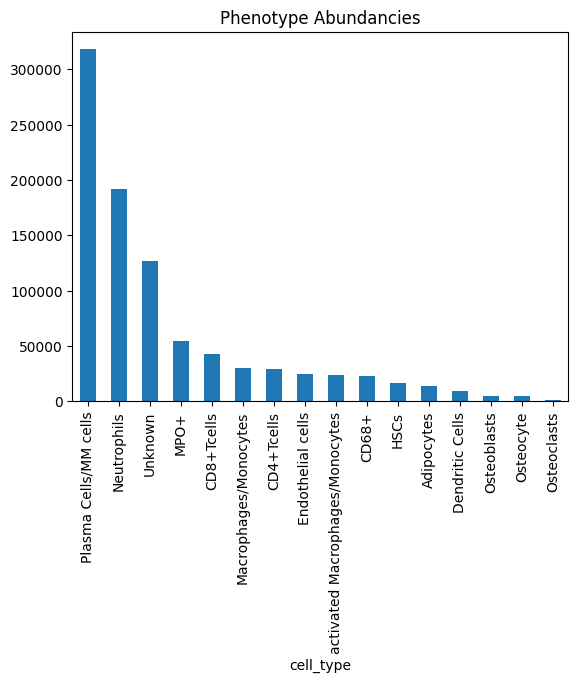

In [1]:
#plotting a barplot of cell type frequencies in the myeloma dataset over all samples 

import matplotlib.pyplot as plt
import pandas as pd 

data = pd.read_csv('./7n_output/cells_niches_coordinates_interfaces.csv')

data["cell_type"].value_counts().plot.bar(title="Phenotype Abundancies")
